In [1]:
# IMPORT PYTHON MODULES
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.set_index('GEO_ID', inplace=True)

# Correlation Matrix
Observations: 
1) % black has the highest magnitude of correlation with percentage of lead levels, followed by old housing.
2) % in poverty has a high inverse correlation with % w/bachelor's degree or higher.
3) Simpson's DI is negatively correlated with % black.
4) Bachelor's degree has very little correlation with neighborhood diversity
5) Higher Bachelor's degree percentage decreases percentage of owner occupied units
6) Most worrisome correlation is Simpson's DI and % black, but these are being tested in separate models, so there's no issue

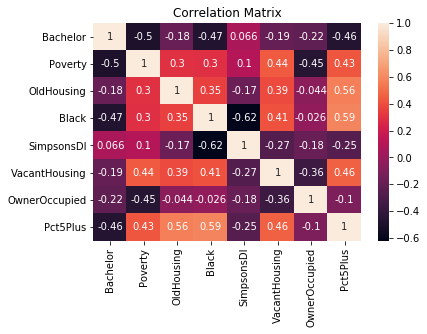

In [77]:
plt.title('Correlation Matrix')
sns.heatmap(data[['Bachelor', 'Poverty', 'OldHousing', 'Black', 'SimpsonsDI', 'VacantHousing', 'OwnerOccupied',
                 'Pct5Plus']].corr(), annot=True)

# Histograms

Text(0, 0.5, '# of Census Tracts')

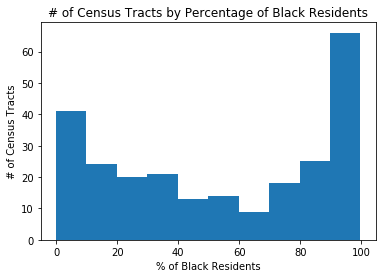

In [25]:
plt.hist(data['Black'])
plt.title("# of Census Tracts by Percentage of Black Residents")
plt.xlabel('% of Black Residents')
plt.ylabel('# of Census Tracts')

Text(0, 0.5, '# of Census Tracts')

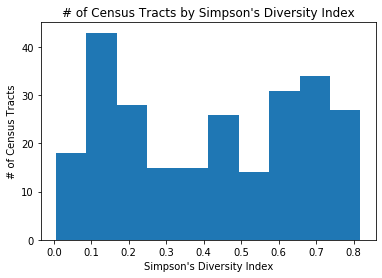

In [26]:
plt.hist(data['SimpsonsDI'])
plt.title("# of Census Tracts by Simpson's Diversity Index")
plt.xlabel('Simpson\'s Diversity Index')
plt.ylabel('# of Census Tracts')

Text(0, 0.5, '# of Census Tracts')

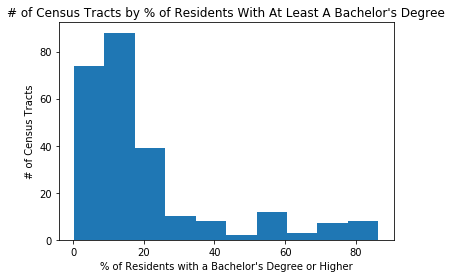

In [28]:
plt.hist(data['Bachelor'])
plt.title("# of Census Tracts by % of Residents With At Least A Bachelor's Degree")
plt.xlabel('% of Residents with a Bachelor\'s Degree or Higher')
plt.ylabel('# of Census Tracts')

Text(0, 0.5, '# of Census Tracts')

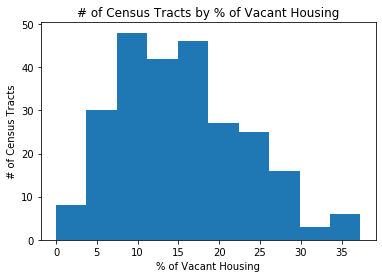

In [29]:
plt.hist(data['VacantHousing'])
plt.title("# of Census Tracts by % of Vacant Housing")
plt.xlabel('% of Vacant Housing')
plt.ylabel('# of Census Tracts')

Text(0, 0.5, '# of Census Tracts')

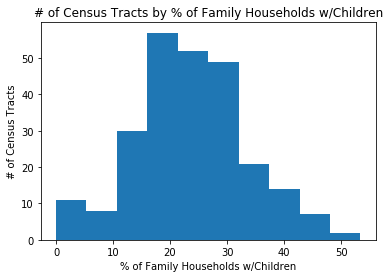

In [41]:
plt.hist(data['FamiliesWithChildren'])
plt.title("# of Census Tracts by % of Family Households w/Children")
plt.xlabel('% of Family Households w/Children')
plt.ylabel('# of Census Tracts')

# Family Households & Lead Levels

Text(0, 0.5, '% of Children With Lead Levels > 5 $\\mu$g/dl')

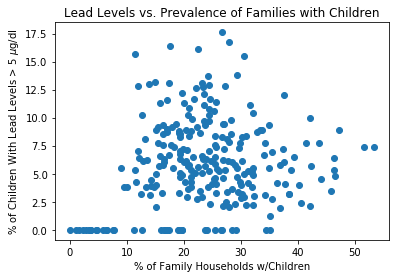

In [75]:
plt.scatter(data['FamiliesWithChildren'], data['Pct5Plus'])
plt.title('Lead Levels vs. Prevalence of Families with Children')
plt.xlabel('% of Family Households w/Children')
plt.ylabel(r'% of Children With Lead Levels > 5 $\mu$g/dl')

In [53]:
data['DummyBlack'] = pd.cut(data['Black'],bins=[0, sum(data['Black'])/len(data['Black']), max(data['Black'])],
       labels=['Smaller % Black', 'Larger % Black'])

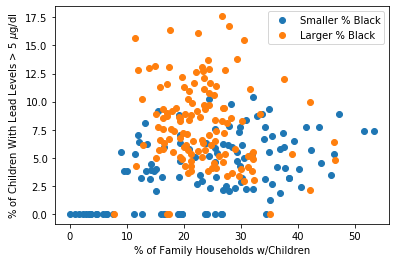

In [64]:
race_data = data.groupby('DummyBlack')
for name, group in race_data:
    plt.plot(group['FamiliesWithChildren'], group['Pct5Plus'], marker="o", linestyle="", label=name)
plt.xlabel('% of Family Households w/Children')
plt.ylabel(r'% of Children With Lead Levels > 5 $\mu$g/dl')
plt.legend()

In [65]:
data['DummyBachelor'] = pd.cut(data['Bachelor'],bins=[0, sum(data['Bachelor'])/len(data['Bachelor']), max(data['Bachelor'])],
       labels=['Fewer Bachelor\'s Degrees', 'More Bachelor\'s Degrees'])

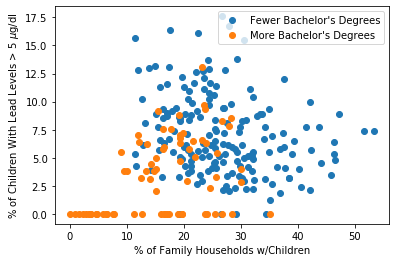

In [70]:
education_data = data.groupby('DummyBachelor')
for name, group in education_data:
    plt.plot(group['FamiliesWithChildren'], group['Pct5Plus'], marker="o", linestyle="", label=name)
plt.xlabel('% of Family Households w/Children')
plt.ylabel('% of Children With Lead Levels > 5 $\mu$g/dl')
plt.legend()

In [71]:
data['DummyPoverty'] = pd.cut(data['Poverty'],bins=[0, sum(data['Poverty'])/len(data['Poverty']), max(data['Poverty'])],
       labels=['Smaller % Below Poverty Line', 'Larger % Below Poverty Line'])

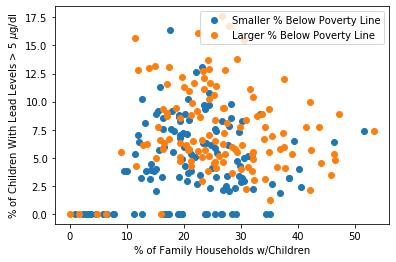

In [72]:
poverty_data = data.groupby('DummyPoverty')
for name, group in poverty_data:
    plt.plot(group['FamiliesWithChildren'], group['Pct5Plus'], marker="o", linestyle="", label=name)
plt.xlabel('% of Family Households w/Children')
plt.ylabel('% of Children With Lead Levels > 5 $\mu$g/dl')
plt.legend()

# Maps
#### Map levels of poverty, education, racial composition, and elevated lead levels for Philadelphia Census Tracts

In [46]:
shape = gpd.read_file('tl_2014_42_tract.shp')
shape = shape[shape['COUNTYFP']=='101']
shape['GEOID'] = pd.to_numeric(shape['GEOID'])
shape.set_index('GEOID', inplace=True)
map_df = gpd.GeoDataFrame(pd.concat([data, shape], join='inner', axis=1))

Text(0.5, 0.98, 'Philadelphia, PA')

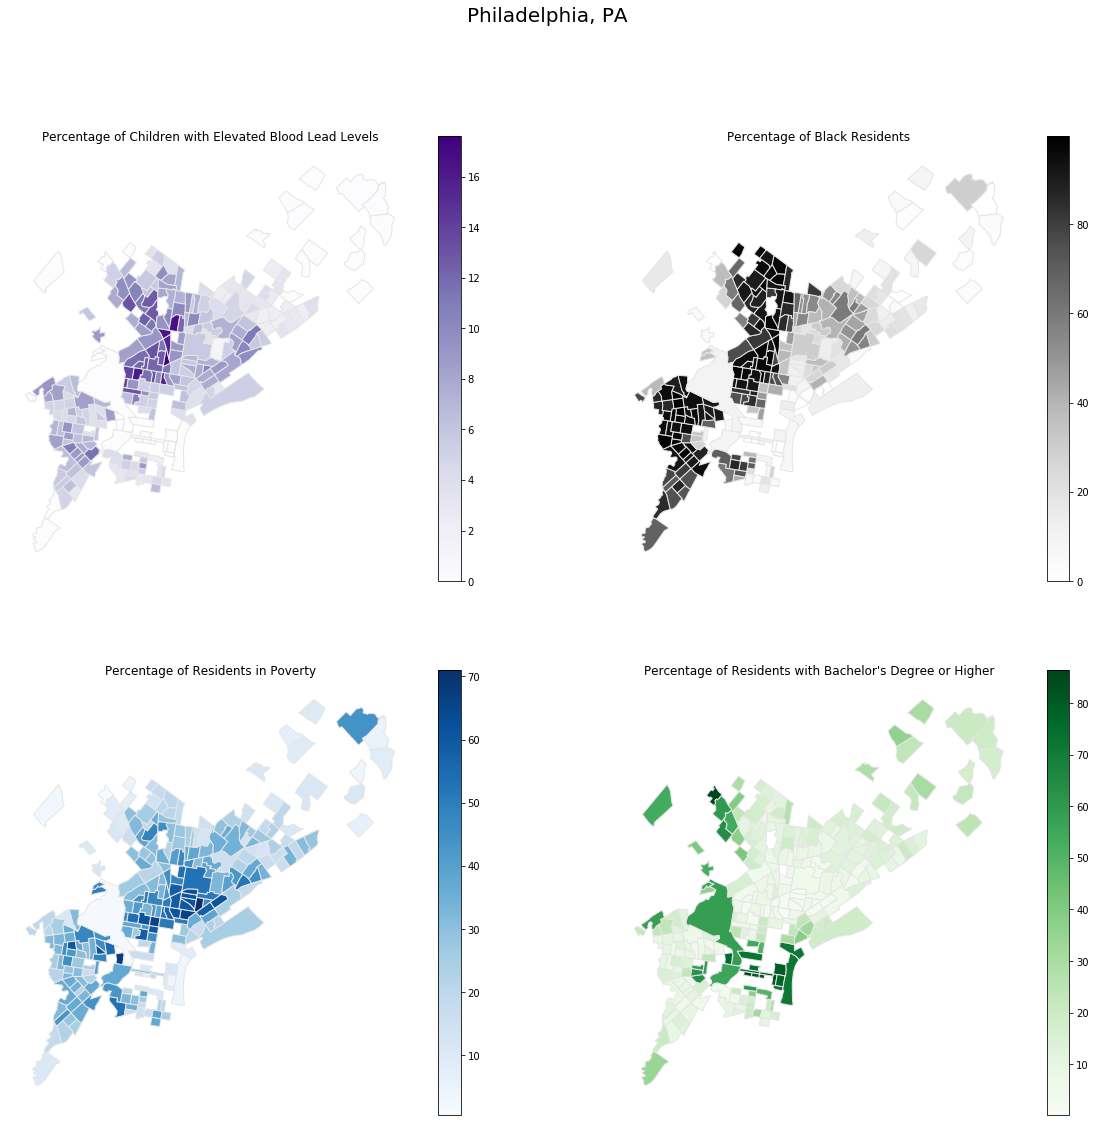

In [71]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20, 18))
map_df.plot(column='Pct5Plus', cmap='Purples', linewidth=1, ax=ax1, edgecolor='0.9', legend = True)
ax1.set_title('Percentage of Children with Elevated Blood Lead Levels')
ax1.axis('off')
map_df.plot(column='Black', cmap='Greys', linewidth=1, ax=ax2, edgecolor='0.9', legend = True)
ax2.set_title('Percentage of Black Residents')
ax2.axis('off')
map_df.plot(column='Poverty', cmap='Blues', linewidth=1, ax=ax3, edgecolor='0.9', legend = True)
ax3.set_title('Percentage of Residents in Poverty')
ax3.axis('off')
map_df.plot(column='Bachelor', cmap='Greens', linewidth=1, ax=ax4, edgecolor='0.9', legend = True)
ax4.set_title('Percentage of Residents with Bachelor\'s Degree or Higher')
ax4.axis('off')
fig.suptitle("Philadelphia, PA", size=20)
